### Predict NBA players salary

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("C:/Users/adhit/Desktop/ARK_streamlit/nba2k-full.csv")

In [68]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [69]:
df.shape

(464, 15)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [71]:
# drop any null
df = df.dropna()

In [72]:
# check if any null
df.isnull().sum().sum()

0

In [73]:
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version'], axis=1)

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [74]:
# function to remove #
def removehash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(removehash)

In [75]:
# sanity check
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [76]:
df['salary'] = df['salary'].apply(removehash)

In [77]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


#### Let's convert categories to label encoded:

In [78]:
# checking team
df['team'].value_counts()

Brooklyn Nets             17
Los Angeles Clippers      15
Los Angeles Lakers        15
Indiana Pacers            14
Milwaukee Bucks           14
Philadelphia 76ers        14
Orlando Magic             14
New Orleans Pelicans      14
New York Knicks           13
Chicago Bulls             13
Toronto Raptors           13
Minnesota Timberwolves    13
Houston Rockets           13
Memphis Grizzlies         12
Detroit Pistons           12
Sacramento Kings          12
Phoenix Suns              12
Miami Heat                12
San Antonio Spurs         12
Atlanta Hawks             12
Denver Nuggets            12
Golden State Warriors     11
Dallas Mavericks          11
Boston Celtics            11
Portland Trail Blazers    11
Washington Wizards        11
Oklahoma City Thunder     10
Cleveland Cavaliers       10
Utah Jazz                  9
Charlotte Hornets          7
Name: team, dtype: int64

In [79]:
#checking countries
df['country'].value_counts()

USA                   315
Canada                 15
Australia               8
Cameroon                5
Nigeria                 3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: country, dtype: int64

In [80]:
def regroup_country(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(regroup_country)
df['country'].value_counts()

USA          315
Others        31
Canada        15
Australia      8
Name: country, dtype: int64

In [81]:
# player position check
df['position'].value_counts()

G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: position, dtype: int64

In [82]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [83]:
# checking draft_round

df['draft_round'].unique

<bound method Series.unique of 1      1
3      1
4      1
5      1
6      1
      ..
457    1
458    1
459    1
460    1
462    1
Name: draft_round, Length: 369, dtype: object>

In [84]:
# checking draft_peak

df['draft_peak'].unique

<bound method Series.unique of 1      15
3       2
4       3
5       7
6       1
       ..
457    27
458    13
459     4
460     3
462    24
Name: draft_peak, Length: 369, dtype: object>

In [85]:
df[df['draft_peak']=='Undrafted']

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
81,80,33,Houston Rockets,F,11301219,USA,2013,Undrafted,Undrafted
109,79,23,Toronto Raptors,G,9346153,USA,2006,Undrafted,Undrafted
121,78,4,Los Angeles Clippers,F,4767000,USA,2012,Undrafted,Undrafted
167,76,5,Dallas Mavericks,G,2564753,Others,2006,Undrafted,Undrafted
175,76,0,Atlanta Hawks,C,13333334,USA,2013,Undrafted,Undrafted
188,76,9,Milwaukee Bucks,G,2564753,USA,2009,Undrafted,Undrafted
204,75,46,Phoenix Suns,C,5453280,Australia,2009,Undrafted,Undrafted
205,75,26,Sacramento Kings,G,19269663,USA,2012,Undrafted,Undrafted
213,75,11,San Antonio Spurs,G,2875000,USA,2016,Undrafted,Undrafted
228,75,9,Indiana Pacers,G,3500000,USA,2015,Undrafted,Undrafted


In [86]:
#lets remove undrafted in round and peak

def removeundrafted(value):
    if value == 'Undrafted':
        return
    else:
        return value

df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)
        

In [87]:
df = df.dropna()

#### Lets do label encoder on string column


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


#### We have encoded all the string columns

In [89]:
# quick check on columns since they are all numbers
df.describe()

,rating,jersey,team,position,salary,country,draft_year
count,317.000000,317.000000,317.000000,317.000000,3.170000e+02,317.000000,317.000000
mean,78.337539,13.839117,14.665615,3.362776,1.145762e+07,2.782334,2014.066246
std,6.820688,14.861682,8.431886,1.742326,1.178645e+07,0.589950,3.915891
min,68.000000,0.000000,0.000000,0.000000,7.956800e+04,0.000000,2003.000000
25%,73.000000,3.000000,8.000000,2.000000,2.351838e+06,3.000000,2011.000000
50%,77.000000,10.000000,15.000000,3.000000,6.500000e+06,3.000000,2015.000000
75%,82.000000,22.000000,22.000000,5.000000,1.564375e+07,3.000000,2017.000000
max,97.000000,99.000000,29.000000,6.000000,4.578097e+07,3.000000,2019.000000


#### X - y values

In [90]:
X = df.drop(['salary'], axis=1)

y = df['salary']

#### train test split

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Linear regression model

In [92]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

In [93]:
# prediction difference

difference = y_test - predictions

### Plot dist plot

C:\Users\adhit\AppData\Local\Temp\ipykernel_23472\1773680543.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(difference)


<Axes: xlabel='salary', ylabel='Density'>

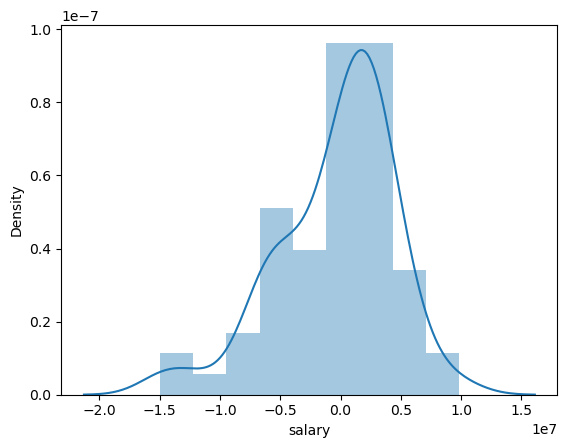

In [94]:
import seaborn as sns
sns.distplot(difference)

In [95]:
# Finding R-square

from sklearn.metrics import r2_score

# Assuming you've already trained your LinearRegression model and made predictions

# Calculate the R-squared score
r2 = r2_score(y_test, predictions)

print("R-squared:", r2)


R-squared: 0.7914186085472628


## Let's save this model

In [97]:
# importing pickle packages
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))